### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
coffee_shops = pd.read_csv('data/coffee.csv')

### Previewing data

In [3]:
coffee_shops.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


### Data Validation

In [4]:
coffee_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [5]:
coffee_shops.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


Ratings and reviews are floats, with the former being between 0 and 5 and the latter being a positive number. Categorical features are of object type and need to be checked to see if all values within each feature are strings. This is because Pandas casts strings and mixed types to objects; thus, an object type may hold types other than a string. Moreover, categorical values need to be checked to see if they fall into the proper categories.

##### Missing Values:

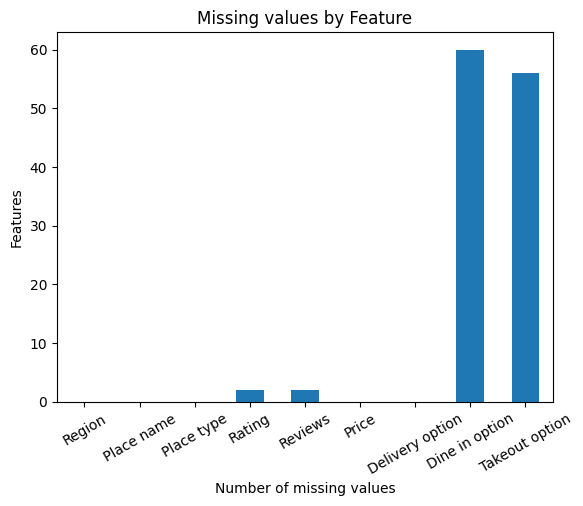

In [6]:
coffee_shops.isna().sum().plot(kind="bar", rot=30)
plt.title('Missing values by Feature')
plt.ylabel('Features')
plt.xlabel('Number of missing values')
plt.show()

##### Region:

In [7]:
# should include values from A to J only
regions_str = coffee_shops["Region"].apply(type).eq(str).all()
regions = np.sort(coffee_shops.Region.unique())
print(f"all regions are strings: {regions_str}\n\
unique regions: {', '.join(regions)}")

all regions are strings: True
unique regions: A, B, C, D, E, F, G, H, I, J


##### Place name:

In [8]:
# Should be of type string
# note that we can't simply use the dtype method on the column
# because it returns an object type which can refer to several
# types
place_names_str = coffee_shops[["Place name"]].applymap(type).eq(str).all()
print(f"all place names are strings: {place_names_str[0]}")

all place names are strings: True


##### Place type:

In [9]:
# Should be any of 'Coffee shop', 'Cafe', 'Espresso bar', and 'Others' strings
place_type_str = coffee_shops[["Place type"]].applymap(type).eq(str).all()
values = np.sort(coffee_shops["Place type"].unique())
print(f"all place types are strings: {place_type_str[0]}\nplace types: {', '.join(values)}")

all place types are strings: True
place types: Cafe, Coffee shop, Espresso bar, Others


##### Rating:

In [10]:
# Imputing missing ratings with the mean rating value
n_missing_ratings_b = coffee_shops["Rating"].isna().sum()
avg = coffee_shops["Rating"].mean()
coffee_shops.fillna({'Rating': avg}, inplace=True)
# sanity check
n_missing_ratings_a = coffee_shops["Rating"].isna().sum()
print(f"number of missing ratings before imputation: {n_missing_ratings_b}\n\
number of missing ratings after imputation: {n_missing_ratings_a}")

number of missing ratings before imputation: 2
number of missing ratings after imputation: 0


##### Reviews:

In [11]:
# removing rows containing null reviews
print(f"number of rows before dropping: {len(coffee_shops)} rows.")
coffee_shops.dropna(subset="Reviews", inplace=True)
print(f"number of rows after dropping: {len(coffee_shops)} rows.")

number of rows before dropping: 200 rows.
number of rows after dropping: 198 rows.


##### Price:

In [12]:
price_str = coffee_shops["Price"].apply(type).eq(str).all()
price_values = coffee_shops["Price"].unique()
print(f"all prices are strings: {price_str}\nprice values are: {', '.join(price_values)}")

all prices are strings: True
price values are: $$, $, $$$


##### Dine in option & Takeout option:

In [13]:
# converting to bool:
coffee_shops["Dine in option"] = coffee_shops["Dine in option"].astype(bool)
coffee_shops["Takeout option"] = coffee_shops["Takeout option"].astype(bool)

# replacing missing values with False
coffee_shops["Dine in option"].fillna(False, inplace=True)
coffee_shops["Takeout option"].fillna(False, inplace=True)

Finally, we have a neat dataframe with validated values:

In [14]:
coffee_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   198 non-null    bool   
 8   Takeout option   198 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.4+ KB


### Data Discovery and Visualization

#### What is the most common place type in this local market?

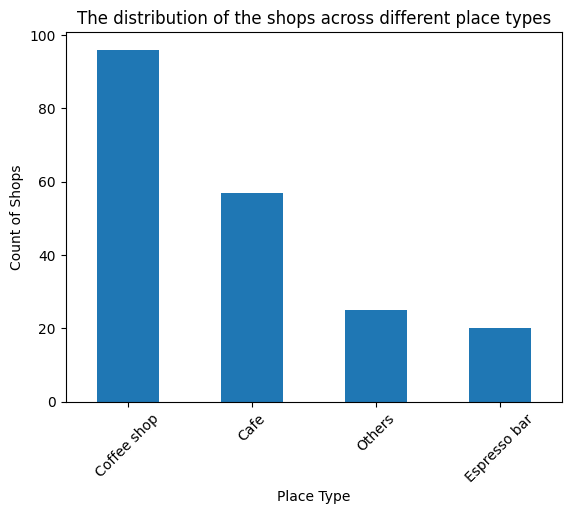

In [15]:
coffee_shops['Place type'].value_counts().plot(kind='bar', rot=45)
plt.title('The distribution of the shops across different place types')
plt.ylabel('Count of Shops')
plt.xlabel('Place Type')
plt.show()

We notice that coffee shops are the most common type of establishment in this market. Around 100 places, standing for half the total number, are coffee shops, and the other half is distributed between the other types. Cafes take the second place, with almost 60 of them out of all the places.

#### How does the range in number of reviews differ across all shops?

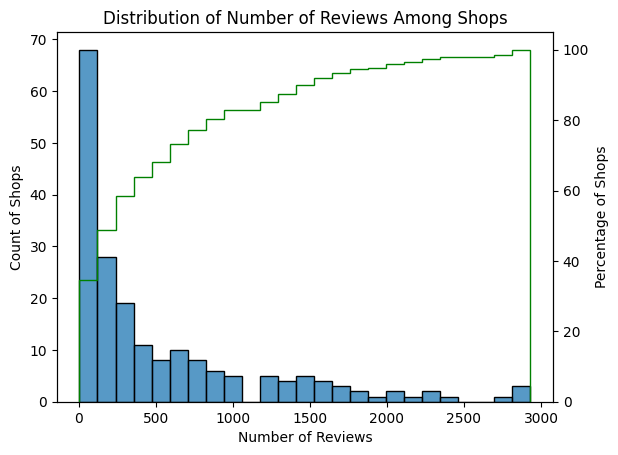

In [16]:
csf = coffee_shops[coffee_shops["Reviews"]<5000] # removing outlier for a better plot
l = len(csf)
weights = [100 / l] * l # to normalize cumulative distribution to 100

fig, ax1 = plt.subplots()

sns.histplot(data=coffee_shops[coffee_shops["Reviews"]<5000], 		
             x="Reviews",
             bins=25,
             ax=ax1,)

ax2 = ax1.twinx()

ax2.hist(x=csf["Reviews"], bins=25, cumulative=True, histtype='step', weights = weights, color="green")

ax1.set_xlabel("Number of Reviews")
ax1.set_ylabel("Count of Shops")
ax2.set_ylabel("Percentage of Shops")
plt.title("Distribution of Number of Reviews Among Shops")
plt.show()

One can notice that the number of reviews varies greatly across shops, with a range between 0 and 3000. More than 80% of stores have 1000 or fewer reviews. Around 20 percent of shops have between 1000 and (approximately) 3000 reviews.

#### How does the number of reviews vary across each place type?

We have seen that the number of reviews varies greatly between shops. A drill-down should be done to explore the range of reviews across each type of shop.

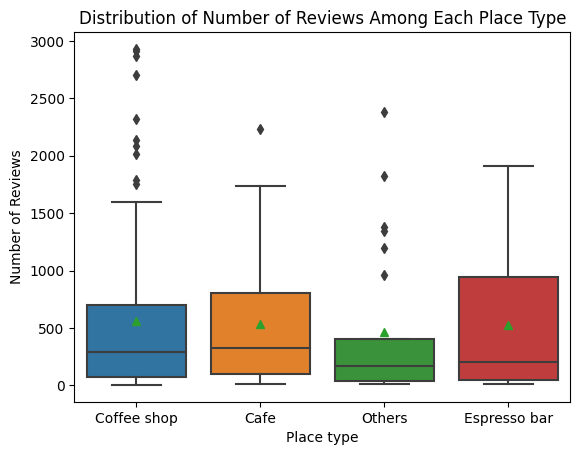

In [41]:
sns.boxplot(data=csf,
            y="Reviews",
            x="Place type",
            order=["Coffee shop", "Cafe", "Others", "Espresso bar"],
            dodge=False,
            showmeans=True)

plt.legend([], frameon=False)
plt.title("Distribution of Number of Reviews Among Each Place Type")
plt.ylabel("Number of Reviews")
plt.show()

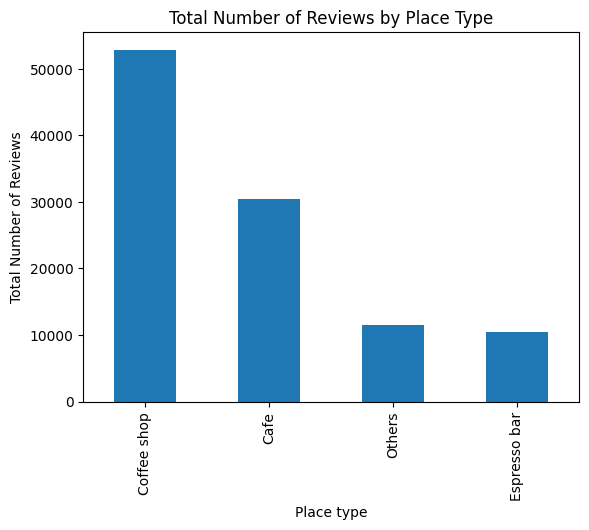

In [44]:
csf.groupby("Place type")["Reviews"] \
			.sum() \
			.sort_values(ascending=False) \
			.plot(kind="bar")
plt.ylabel("Total Number of Reviews")
plt.title("Total Number of Reviews by Place Type")
plt.show()

Based on the above graphs, the average number of reviews of coffee shops is close to that of cafes and slightly greater than it, which is in turn slightly greater than the espresso bars. 

However, observing the quartile values, we can infer that the majority of cafes have a higher number of reviews than do coffee shops, even though the latter do include the places with the highest review numbers. Moreover, the majority

It is worth noting that the large number of coffee shops contributes to bringing down the majority of review numbers against cafes, having a large number of places with a low review count under this type. This fact is reflected in the three graphs: The total number of reviews by place type, the distribution of the shops across different place types, and the box plot.

The three graphs indicate that, although coffee shops are the most abundant, and have the highest total number of reviews among all place types, the majority of places have fewer reviews than cafes and espresso bars. This indicates a higher skewness of the number of reviews in coffee shops than cafes, as shown below:

<AxesSubplot:xlabel='Reviews', ylabel='Count'>

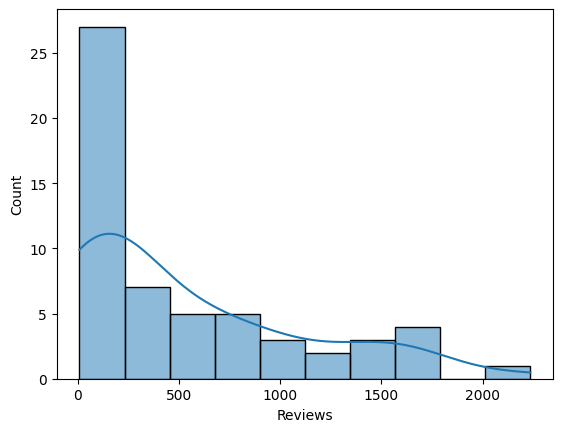

In [53]:
sns.histplot(data=csf[csf["Place type"]=="Cafe"], x="Reviews", bins=10, kde=True)

<AxesSubplot:xlabel='Reviews', ylabel='Count'>

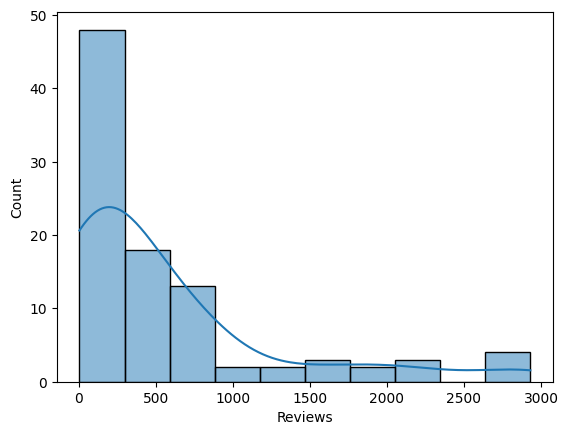

In [52]:
sns.histplot(data=csf[csf["Place type"]=="Coffee shop"], x="Reviews", bins=10, kde=True)

In conclusion, although variation exists between place types in terms of number of reviews across different measurements, the team should target cafes, espresso bars, and coffee shops with a number of reviews greater than 1000, as this is the minority that accounts for 20%  of total shops. If they plan to spread their products across a larger market, they can lower the number of reviews per shop, respectively, so that they still target the shops with the highest review numbers among other shops. In addition to that, it is recommended to tackle some shops with a low number of reviews. This will later be used to test the impact of the number of reviews on the popularity of the new cups.